In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
iteration = "//Users/onurserce/iteration-3/"

dataframes = []

for directory in os.listdir(iteration):
    if os.path.isdir(os.path.join(iteration, directory)):
        subdir = os.path.join(iteration, directory)
        for file in os.listdir(subdir):
            if file.endswith('results.csv'):
                print("appending", file)
                file_df = pd.read_csv(os.path.join(subdir, file), index_col=0)
                file_df["model"] = file.split("_")[1]
                dataframes.append(file_df)
        
df = pd.concat(dataframes, axis=0, ignore_index=True)

#df = df.sort_values(by=" Test error(px)", ascending=True)
df = df.sort_values(by="Test error with p-cutoff", ascending=True)
#df = df[df["Training iterations:"] != 50000]

df

appending DLC_resnet152_dlc_realApr6shuffle7_250000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle0_250000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle9_250000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle8_250000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle1_250000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle6_250000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle3_250000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle4_250000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle5_250000-results.csv
appending DLC_resnet152_dlc_realApr6shuffle2_250000-results.csv


,Training iterations:,%Training dataset,Shuffle number,Train error(px),Test error(px),p-cutoff used,Train error with p-cutoff,Test error with p-cutoff,model
60,110000,90,1,12.08,21.52,0.85,5.43,4.52,resnet152
79,150000,90,6,11.41,23.16,0.85,4.08,4.62,resnet152
62,130000,90,1,11.58,20.84,0.85,5.20,5.19,resnet152
61,120000,90,1,12.06,21.12,0.85,5.36,5.20,resnet152
66,170000,90,1,11.94,21.58,0.85,5.31,5.28,resnet152
...,...,...,...,...,...,...,...,...,...
138,140000,90,2,11.55,19.11,0.85,4.67,12.43,resnet152
146,220000,90,2,11.23,18.32,0.85,4.37,12.44,resnet152
145,210000,90,2,11.23,18.33,0.85,4.37,12.45,resnet152
137,130000,90,2,11.68,18.60,0.85,4.71,12.74,resnet152


In [11]:
df = df.sort_values(by=" Test error(px)", ascending=True)
df

,Training iterations:,%Training dataset,Shuffle number,Train error(px),Test error(px),p-cutoff used,Train error with p-cutoff,Test error with p-cutoff,model
105,110000,90,4,13.97,15.02,0.85,5.74,7.59,resnet152
31,120000,90,9,11.42,15.73,0.85,5.49,7.83,resnet152
107,130000,90,4,14.00,16.06,0.85,5.90,9.00,resnet152
106,120000,90,4,14.02,16.16,0.85,5.93,8.96,resnet152
108,140000,90,4,13.87,16.18,0.85,5.67,8.93,resnet152
...,...,...,...,...,...,...,...,...,...
81,170000,90,6,11.41,23.24,0.85,4.45,5.85,resnet152
83,190000,90,6,11.39,23.24,0.85,4.45,5.85,resnet152
76,120000,90,6,11.58,23.30,0.85,4.64,7.19,resnet152
75,110000,90,6,11.60,23.85,0.85,4.38,5.29,resnet152


In [3]:
df.drop(df.columns[[1, 3, 5, 6]], axis=1).groupby(["Shuffle number", "Training iterations:"]).describe()

Test error(px)                           \
                                              count   mean std    min    25%   
Shuffle number Training iterations:                                            
0              110000                           1.0  18.05 NaN  18.05  18.05   
               120000                           1.0  16.72 NaN  16.72  16.72   
               130000                           1.0  16.68 NaN  16.68  16.68   
               140000                           1.0  16.47 NaN  16.47  16.47   
               150000                           1.0  17.68 NaN  17.68  17.68   
...                                             ...    ...  ..    ...    ...   
9              210000                           1.0  17.93 NaN  17.93  17.93   
               220000                           1.0  17.93 NaN  17.93  17.93   
               230000                           1.0  17.93 NaN  17.93  17.93   
               240000                           1.0  17.94 NaN  17.94  17.94   
               250000                           1.0  17.94 NaN  17.94  17.94   

                                                          \
                                       50%    75%    max   
Shuffle number Training iterations:                        
0              110000                18.05  18.05  18.05   
               120000                16.72  16.72  16.72   
               130000                16.68  16.68  16.68   
               140000                16.47  16.47  16.47   
               150000                17.68  17.68  17.68   
...                                    ...    ...    ...   
9              210000                17.93  17.93  17.93   
               220000                17.93  17.93  17.93   
               230000                17.93  17.93  17.93   
               240000                17.94  17.94  17.94   
               250000                17.94  17.94  17.94   

                                    Test error with p-cutoff                  \
                                                       count  mean std   min   
Shuffle number Training iterations:                                            
0              110000                                    1.0  7.91 NaN  7.91   
               120000                                    1.0  6.98 NaN  6.98   
               130000                                    1.0  7.55 NaN  7.55   
               140000                                    1.0  6.92 NaN  6.92   
               150000                                    1.0  8.53 NaN  8.53   
...                                                      ...   ...  ..   ...   
9              210000                                    1.0  7.91 NaN  7.91   
               220000                                    1.0  7.90 NaN  7.90   
               230000                                    1.0  7.90 NaN  7.90   
               240000                                    1.0  7.90 NaN  7.90   
               250000                                    1.0  7.90 NaN  7.90   

                                                             
                                      25%   50%   75%   max  
Shuffle number Training iterations:                          
0              110000                7.91  7.91  7.91  7.91  
               120000                6.98  6.98  6.98  6.98  
               130000                7.55  7.55  7.55  7.55  
               140000                6.92  6.92  6.92  6.92  
               150000                8.53  8.53  8.53  8.53  
...                                   ...   ...   ...   ...  
9              210000                7.91  7.91  7.91  7.91  
               220000                7.90  7.90  7.90  7.90  
               230000                7.90  7.90  7.90  7.90  
               240000                7.90  7.90  7.90  7.90  
               250000                7.90  7.90  7.90  7.90  

[150 rows x 16 columns]

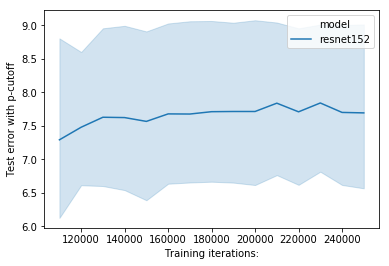

In [4]:
sns.lineplot(data=df, x="Training iterations:", y="Test error with p-cutoff", hue="model", style="model")

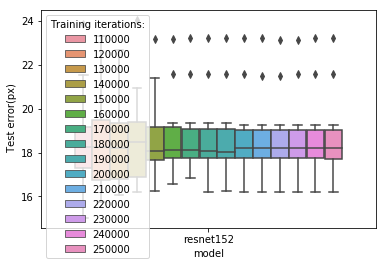

In [5]:
sns.boxplot(data=df, y=" Test error(px)", x="model", hue="Training iterations:")

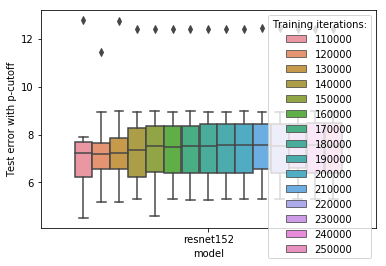

In [6]:
sns.boxplot(data=df, y="Test error with p-cutoff", x="model", hue="Training iterations:")

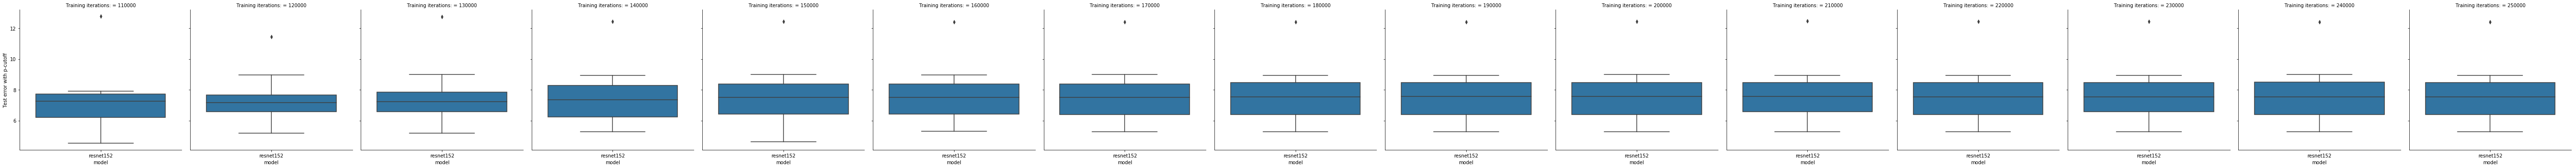

In [7]:
sns.catplot(data=df, y="Test error with p-cutoff", x="model", col="Training iterations:", kind="box")

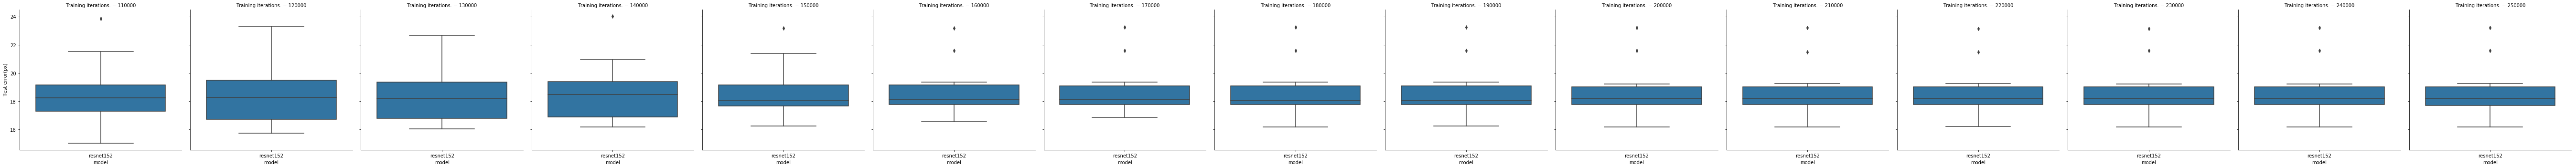

In [8]:
sns.catplot(data=df, y=" Test error(px)", x="model", col="Training iterations:", kind="box")

## Conclusion:

shuffle number 1 trained for 110000 it seems to be the best for test-error *with p-cutoff*
shuffle number 4 trained for 110000 it seems to be the best for test-error *without p-cutoff*
**will be proceeded with shuffle 4**
